In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [4]:
# 데이터 로드 및 전처리 과정
X_data = pd.read_csv(r'D:\MusicTrendAnalysis\data\X_data.csv')  
# X 데이터 로드
y_data = pd.read_csv(r'D:\MusicTrendAnalysis\data\y_data.csv')  
# y 데이터 로드

scaler = MinMaxScaler()  # MinMaxScaler를 사용해 0과 1 사이로 정규화
X_scaled = scaler.fit_transform(X_data)

time_steps = 5  # LSTM에서 사용할 타임스텝 설정
X_lstm, y_lstm = [], []
for i in range(len(X_scaled) - time_steps):
    X_lstm.append(X_scaled[i:i + time_steps, :])
    y_lstm.append(y_data.iloc[i + time_steps].values)

X_lstm = np.array(X_lstm)  # 리스트를 NumPy 배열로 변환
y_lstm = np.array(y_lstm)

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

In [5]:
# 개선된 LSTM 모델 정의
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input 레이어로 입력 형상 지정
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))  # 양방향 LSTM 계층
model.add(Dropout(0.3))  # 과적합 방지를 위한 Dropout 계층 추가
model.add(LSTM(units=50))  # 두 번째 LSTM 계층 (마지막 시퀀스 반환)
model.add(Dense(2))  # 출력층 (출력값의 차원이 2이므로 2개의 뉴런)

In [6]:
# 모델 컴파일 (손실 함수: 평균 제곱 오차, 옵티마이저: Adam, 학습률 조정)
model.compile(optimizer='adam', loss='mean_squared_error')


In [7]:
# 조기 종료 콜백 설정 (검증 손실이 더 이상 감소하지 않으면 학습을 멈춤)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [8]:
# 모델 학습 (훈련 데이터와 검증 데이터를 사용하여 모델 학습)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 16295352.0000 - val_loss: 15557845.0000
Epoch 2/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 16243339.0000 - val_loss: 15495438.0000
Epoch 3/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 15874175.0000 - val_loss: 15434027.0000
Epoch 4/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 16039218.0000 - val_loss: 15373368.0000
Epoch 5/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 16038232.0000 - val_loss: 15313265.0000
Epoch 6/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 15830957.0000 - val_loss: 15253513.0000
Epoch 7/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 15866723.0000 - val_loss: 15194168.0000
Epoch 8/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15628495.0000 - val_loss: 15135080.0000
Epoch 9/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15826633.0000 - val_loss: 15076431.0000
Epoch 10/100
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15533486.0000 - val_loss: 150

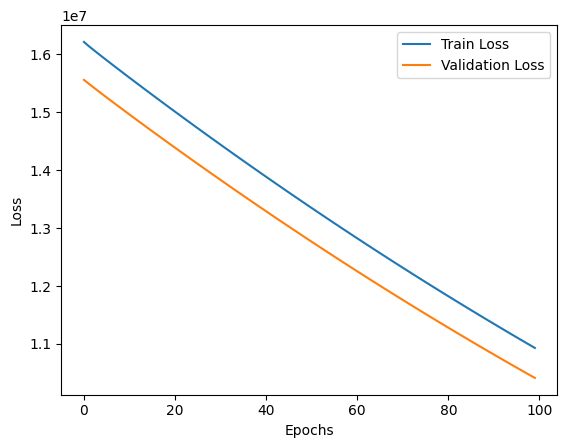

In [9]:
# 학습 손실 시각화 (훈련 손실과 검증 손실을 그래프로 표시)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# 테스트 데이터 예측 및 평가
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Mean Squared Error: 10412430.966426164


추가적으로 그냥 궁금해서 진행하는과정
- 에포크를 최대로 설정해서 돌려본다


Epoch 1/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10976440.0000 - val_loss: 10368264.0000
Epoch 2/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10671103.0000 - val_loss: 10324406.0000
Epoch 3/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10767483.0000 - val_loss: 10280518.0000
Epoch 4/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10955555.0000 - val_loss: 10236919.0000
Epoch 5/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10782091.0000 - val_loss: 10193569.0000
Epoch 6/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10651001.0000 - val_loss: 10150143.0000
Epoch 7/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10595135.0000 - val_loss: 10106949.0000
Epoch 8/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10578648.0000 - val_loss: 10064074.0000
Epoch 9/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 10542859.0000 - val_loss: 10021173.0000
Epoch 10/2000
246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 10382315.0000 - val

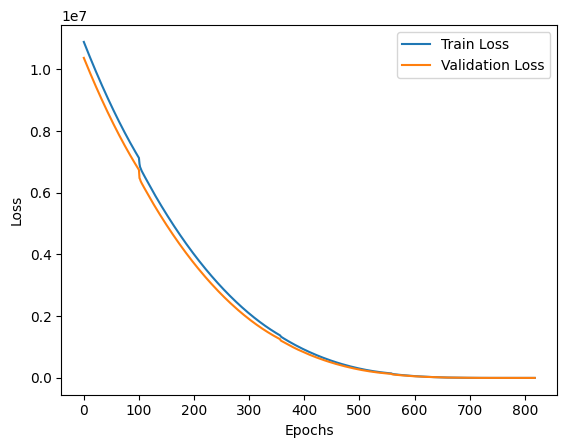

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 469.5347254609625


In [11]:
# 조기 종료 콜백 설정 (검증 손실이 더 이상 감소하지 않으면 학습을 멈춤)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 모델 학습 (훈련 데이터와 검증 데이터를 사용하여 모델 학습)
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 학습 손실 시각화 (훈련 손실과 검증 손실을 그래프로 표시)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 테스트 데이터 예측 및 평가
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
